In [1]:
import os
import numpy as np
import pandas as pd

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kenya_name = 'kenya'
rwanda_name = 'rwanda'
tanzania_name = 'tanzania'
uganda_name = 'uganda'

data_path = '../data/'
full = 'full'
append_in = '_'+full+'.csv'

#where to load from
kenya_load = os.path.join(data_path, full, kenya_name+append_in)
rwanda_load = os.path.join(data_path, full, rwanda_name+append_in)
tanzania_load = os.path.join(data_path, full, tanzania_name+append_in)
uganda_load = os.path.join(data_path, full, uganda_name+append_in)

In [3]:
#load data
kenya = pd.read_csv(kenya_load, index_col=0)
rwanda = pd.read_csv(rwanda_load, index_col=0)
tanzania = pd.read_csv(tanzania_load, index_col=0)
uganda = pd.read_csv(uganda_load, index_col=0)

#drop date column, we don't need this anymore
kenya.drop('Date-Monthly', axis=1, inplace=True)
rwanda.drop('Date-Monthly', axis=1, inplace=True)
tanzania.drop('Date-Monthly', axis=1, inplace=True)
uganda.drop('Date-Monthly', axis=1, inplace=True)

In [4]:
kenya.head()

,precip,mintemp,maxtemp,DAP,Urea,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,...,Arable land (1000 ha),Country area (1000 ha),Cropland (1000 ha),Forest land (1000 ha),Land area (1000 ha),Land under permanent crops (1000 ha),Other naturally regenerated forest (1000 ha),Planted Forest (1000 ha),Primary Forest (1000 ha),price
0,4.460338,10.782270,27.047728,0.719813,0.583126,31314.145917,41560.307667,20926.222417,20634.092417,9572.27775,...,5500.0,58037.0,6020.0,4230.0,56914.0,520.0,4037.0,193.0,0.0,0.68
1,7.107909,10.659104,26.831646,0.719813,0.583126,31372.013333,41654.381333,20973.346333,20681.042333,9607.15600,...,5500.0,58037.0,6020.0,4230.0,56914.0,520.0,4037.0,193.0,0.0,0.64
2,11.365962,11.953104,27.468187,0.719813,0.583126,31429.880750,41748.455000,21020.470250,20727.992250,9642.03425,...,5500.0,58037.0,6020.0,4230.0,56914.0,520.0,4037.0,193.0,0.0,0.63
3,12.749496,13.551364,25.737667,0.737450,0.590842,31487.748167,41842.528667,21067.594167,20774.942167,9676.91250,...,5500.0,58037.0,6020.0,4230.0,56914.0,520.0,4037.0,193.0,0.0,0.64
4,10.510549,12.708521,25.077250,0.726427,0.571000,31545.615583,41936.602333,21114.718083,20821.892083,9711.79075,...,5500.0,58037.0,6020.0,4230.0,56914.0,520.0,4037.0,193.0,0.0,0.65


In [5]:
rwanda.head()

,precip,mintemp,maxtemp,DAP,Urea,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,...,Arable land (1000 ha),Country area (1000 ha),Cropland (1000 ha),Forest land (1000 ha),Land area (1000 ha),Land under permanent crops (1000 ha),Other naturally regenerated forest (1000 ha),Planted Forest (1000 ha),Primary Forest (1000 ha),price
0,13.941298,13.327754,24.736055,0.565489,0.488326,8418.583167,9932.434667,5064.679833,4867.754833,1716.0105,...,1123.92,2634.0,1373.92,446.0,2467.0,250.0,55.0,384.0,7.0,0.42
1,31.847662,13.014627,24.108702,0.565489,0.488326,8437.195333,9953.815333,5075.435667,4878.379667,1719.8480,...,1123.92,2634.0,1373.92,446.0,2467.0,250.0,55.0,384.0,7.0,0.42
2,15.493356,14.120647,24.633526,0.565489,0.488326,8455.807500,9975.196000,5086.191500,4889.004500,1723.6855,...,1123.92,2634.0,1373.92,446.0,2467.0,250.0,55.0,384.0,7.0,0.42
3,18.309883,13.764366,24.545443,0.565489,0.488326,8474.419667,9996.576667,5096.947333,4899.629333,1727.5230,...,1123.92,2634.0,1373.92,446.0,2467.0,250.0,55.0,384.0,7.0,0.37
4,15.413672,13.781482,23.507832,0.565489,0.488326,8493.031833,10017.957333,5107.703167,4910.254167,1731.3605,...,1123.92,2634.0,1373.92,446.0,2467.0,250.0,55.0,384.0,7.0,0.44


In [24]:
def xgboost_cv(df):
    #this is true for every dataset, price is the last column
    X, y = df.iloc[:, :-1], df.iloc[:, -1]

    #create a data matrix, XGBoost data structure
    #we are using the whole dataset because we aren't interested in making predictions, but learning feature importances
    dmatrix = xgb.DMatrix(data=X, label=y)
    
    #look at these parameters when building a model
    params = {"objective":"reg:squarederror",'colsample_bytree': 0.4, 'learning_rate': 0.1,
              'max_depth': 8, 'alpha':4}

    cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=50,
                    early_stopping_rounds=4, metrics=['rmse'], as_pandas=True, seed=42)
    
    xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)
        
    return cv_results, xg_reg

In [25]:
#return cv results and models for each country
kenya_cv, kenya_xgreg = xgboost_cv(kenya)
rwanda_cv, rwanda_xgreg = xgboost_cv(rwanda)
tanzania_cv, tanzania_xgreg = xgboost_cv(tanzania)
uganda_cv, uganda_xgreg = xgboost_cv(uganda)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
45         0.103567        0.001824        0.108743       0.014990
46         0.103504        0.001903        0.108698       0.015043
47         0.103498        0.001911        0.108692       0.015050
48         0.103442        0.001982        0.108652       0.015097
49         0.103377        0.001908        0.108581       0.015006


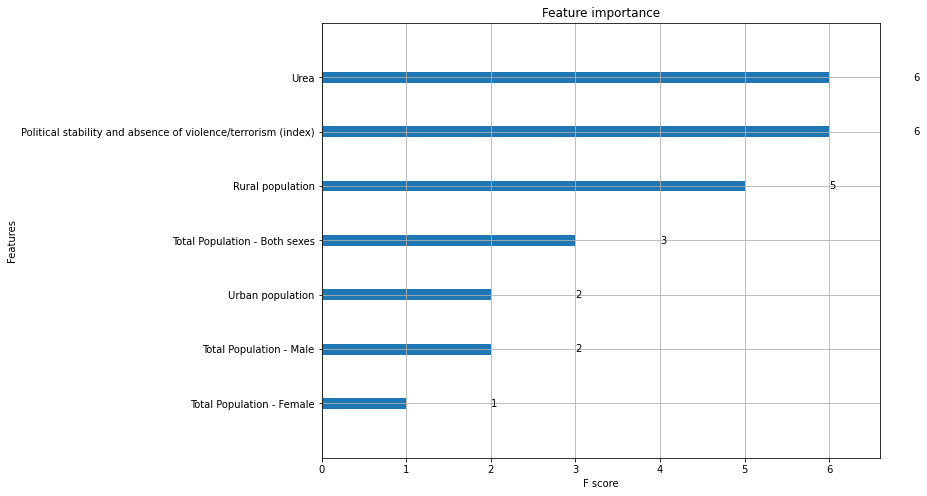

In [26]:
print(kenya_cv[-5:])

fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(kenya_xgreg, max_num_features=10, ax=ax)
plt.show()

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.099948        0.005399        0.099452       0.011322


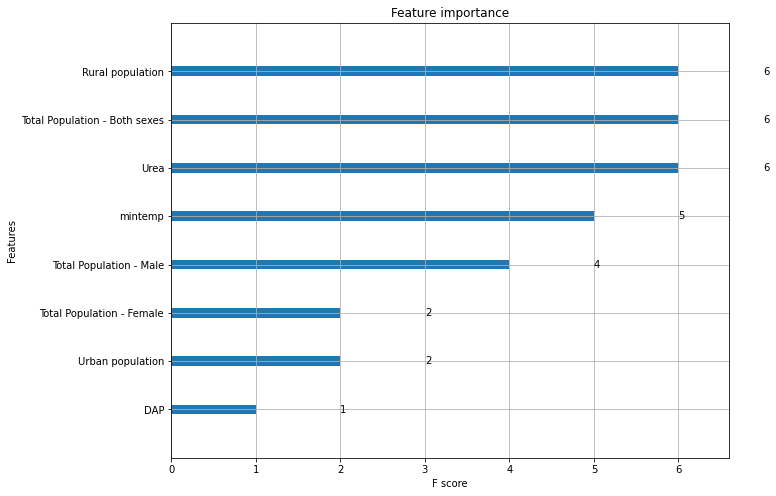

In [27]:
print(rwanda_cv[-5:])

fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(rwanda_xgreg, max_num_features=10, ax=ax)
plt.show()

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
45         0.161007        0.003795        0.168044       0.008335
46         0.160603        0.003803        0.167711       0.008326
47         0.160251        0.003764        0.167418       0.008361
48         0.159949        0.003749        0.167161       0.008398
49         0.159667        0.003738        0.166953       0.008423


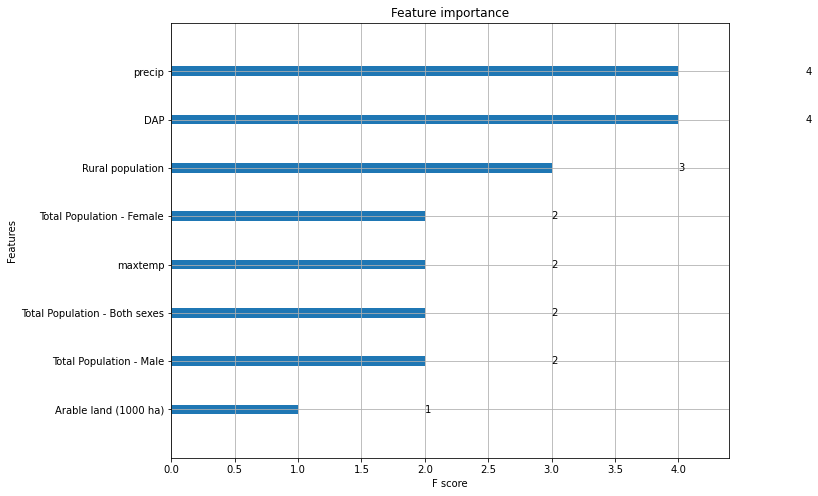

In [28]:
print(tanzania_cv[-5:])

fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(tanzania_xgreg, max_num_features=10, ax=ax)
plt.show()

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
45         0.127914        0.000774        0.131103       0.002083
46         0.127895        0.000786        0.131087       0.002072
47         0.127878        0.000797        0.131074       0.002063
48         0.127863        0.000808        0.131061       0.002054
49         0.127849        0.000818        0.131048       0.002045


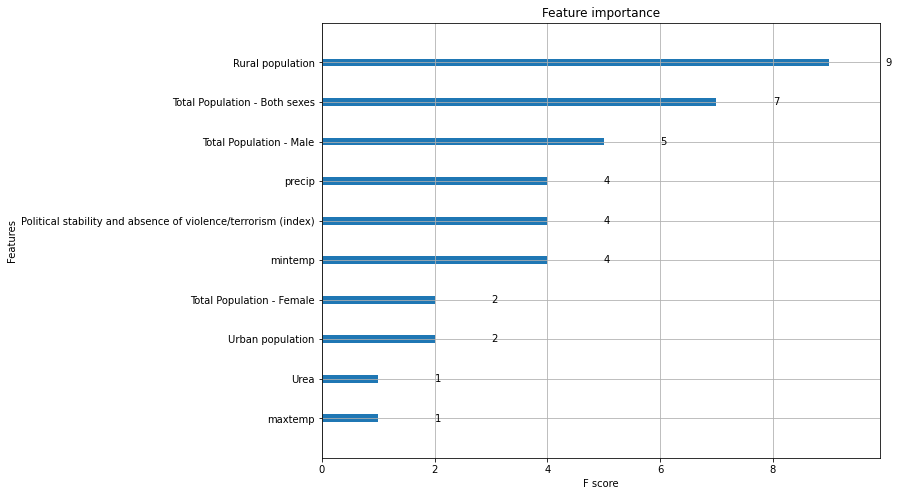

In [29]:
print(uganda_cv[-5:])

fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(uganda_xgreg, max_num_features=10, ax=ax)
plt.show()

So so far:
- `Kenya`: the price of Urea, political instability, and the rural population factor in prominently to price.
- `Rwanda`: population mostly determines price, but it is also affected by Urea price and the minimum temperatures.
- `Tanzania`: precipitation, rural population, and DAP cost seem to be the biggest price influencers.
- `Uganda`: seems much more influenced by total population than anything else, but also is sensitive to precipitation.

The Rwanda data seems particularly affected by the `alpha` regularization parameter. I could try different regularization parameters, but and `alpha` value >= 5 makes it so that no score is reported for Rwanda.

Where to go from here:
- Try to do grid search instead of just cross-validation. Then isolate a best model and use that to plot the feature importances.
- See how a RandomForest model's feature importances compare. You could make the method that you already have more general to accept either a XGBoost or RandomForest model.